## Machine Learning in R
1. Installing the R platform.
1. Loading the dataset.
1. Summarizing the dataset.
1. Visualizing the dataset.
1. Evaluating some algorithms.
1. Making some predictions.

### Install and load Packages

In [1]:
## install
# install.packages("ellipse")
# install.packages('e1071', dependencies=TRUE)
# install.packages("caret", dependencies=c("Depends", "Suggests"))
# install.packages("kernlab")
install.packages("randomForest")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
# load
library(caret)
library(ellipse)
library(e1071)
library(kernlab)
library(randomForest)

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘ellipse’


The following object is masked from ‘package:graphics’:

    pairs



Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




### Load The Data

In [3]:
# define the filename
filename <- "iris.csv"
# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE, stringsAsFactors = FALSE)
# set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

In [4]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

### Summarize Dataset

In [5]:
# dimensions of dataset
dim(dataset)

[1] 120   5

In [6]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"  "character"

In [7]:
# take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


In [8]:
# list the levels for the class
dataset$Species <- as.factor(dataset$Species)
levels(dataset$Species)

[1] "Iris-setosa"     "Iris-versicolor" "Iris-virginica"

In [9]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
Iris-setosa,40,33.33333
Iris-versicolor,40,33.33333
Iris-virginica,40,33.33333


In [10]:
# summarize attribute distributions
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.400   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.775   1st Qu.:1.500   1st Qu.:0.300  
 Median :5.750   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.817   Mean   :3.040   Mean   :3.728   Mean   :1.195  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.200   Max.   :6.900   Max.   :2.500  
            Species  
 Iris-setosa    :40  
 Iris-versicolor:40  
 Iris-virginica :40  
                     
                     
                     

### Visualize Dataset

In [11]:
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

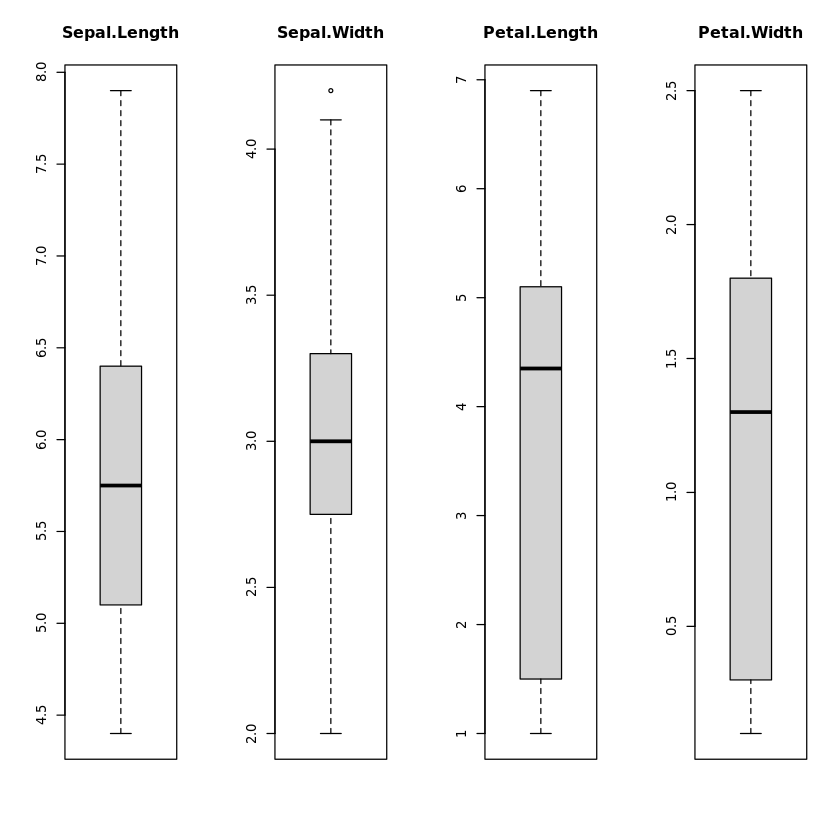

In [12]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

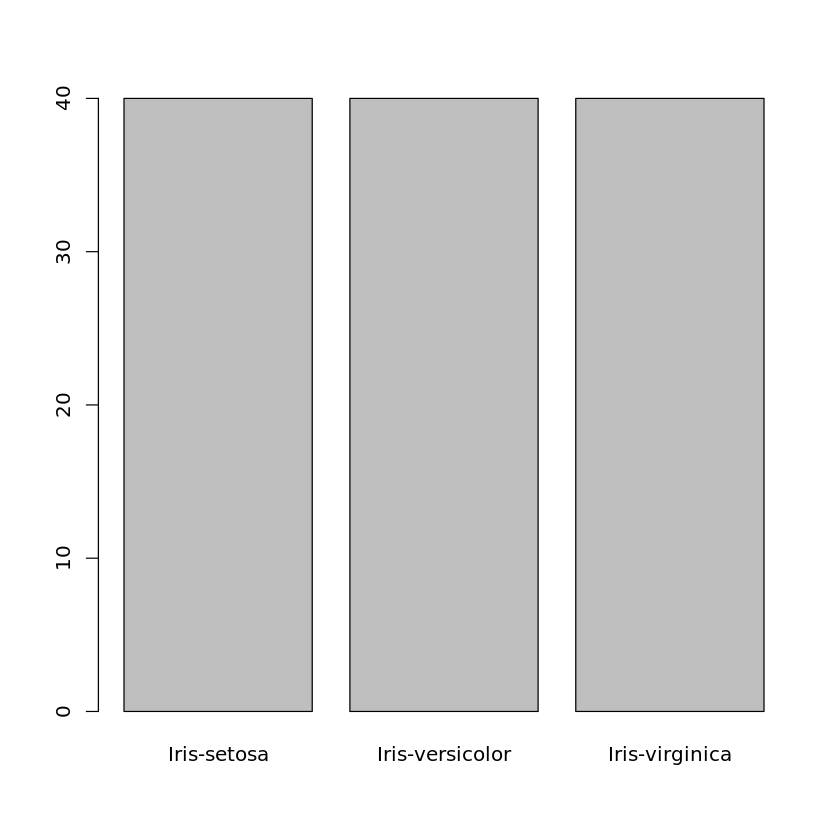

In [13]:
# barplot for class breakdown
plot(y)

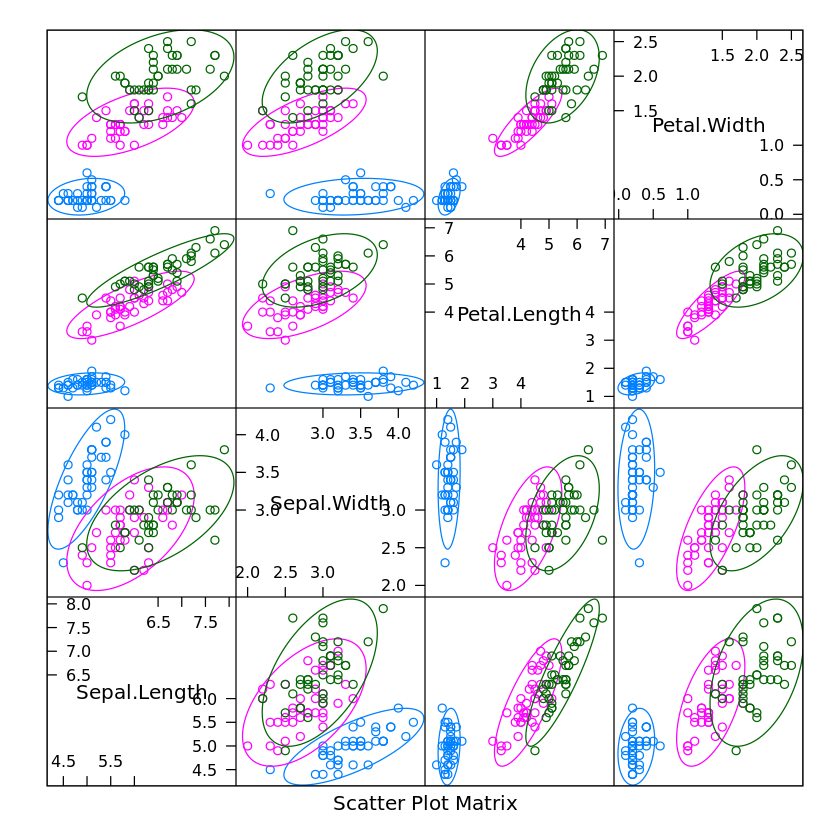

In [14]:
# scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

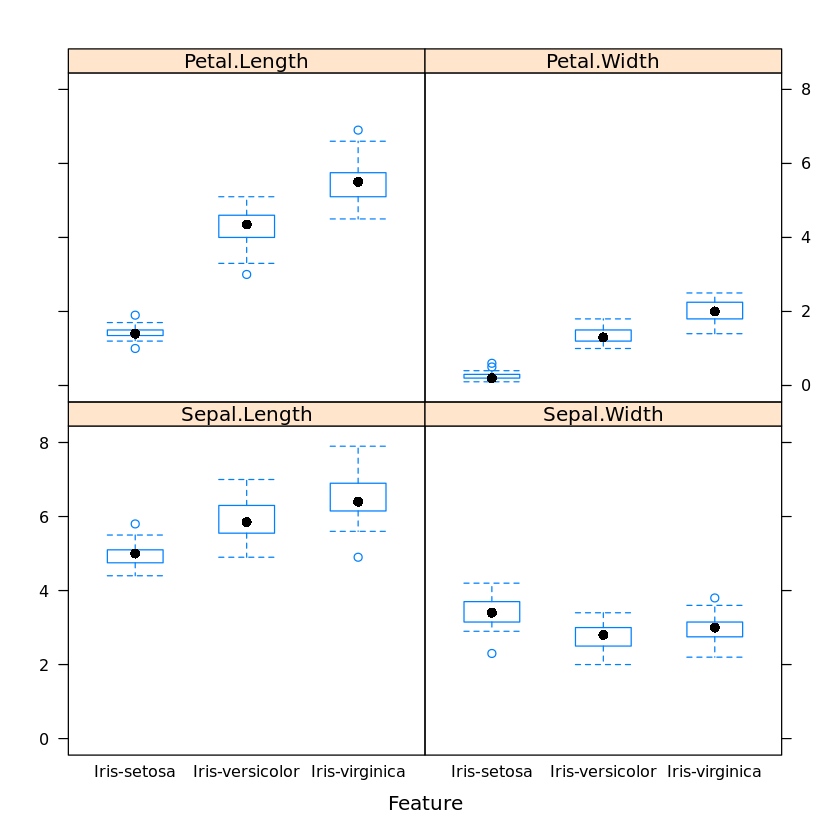

In [15]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

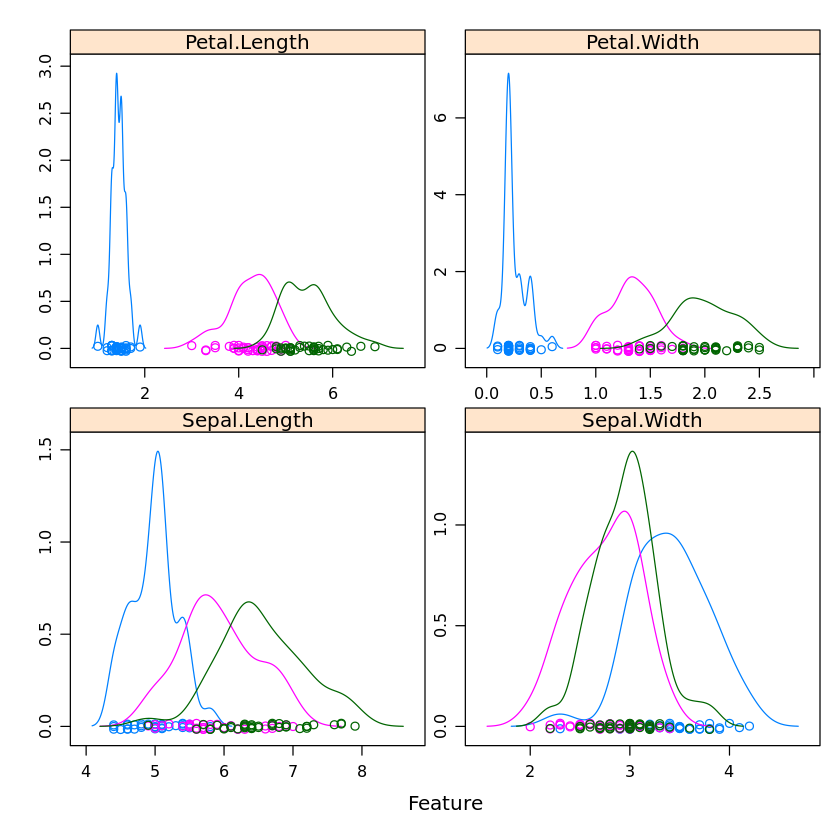

In [16]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

### Evaluate Some Algorithms

- linear algorithms
 1. Linear Discriminant Analysis (LDA)
 
- nonlinear algorithms 
 1. Classification and Regression Trees (CART)
 1. k-Nearest Neighbors (kNN)
 
- advanced algorithms
 1. Support Vector Machines (SVM) with a linear kernel
 1. Random Forest (RF)

In [17]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [18]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)

# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)

# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

In [19]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
lda  0.9166667 0.9166667 1.0000000 0.9666667 1.0000000    1    0
cart 0.8333333 0.8541667 0.9166667 0.9166667 0.9791667    1    0
knn  0.8333333 0.9375000 1.0000000 0.9666667 1.0000000    1    0
svm  0.8333333 0.9166667 0.9583333 0.9500000 1.0000000    1    0
rf   0.8333333 0.9166667 0.9583333 0.9500000 1.0000000    1    0

Kappa 
      Min. 1st Qu. Median  Mean 3rd Qu. Max. NA's
lda  0.875 0.87500 1.0000 0.950 1.00000    1    0
cart 0.750 0.78125 0.8750 0.875 0.96875    1    0
knn  0.750 0.90625 1.0000 0.950 1.00000    1    0
svm  0.750 0.87500 0.9375 0.925 1.00000    1    0
rf   0.750 0.87500 0.9375 0.925 1.00000    1    0


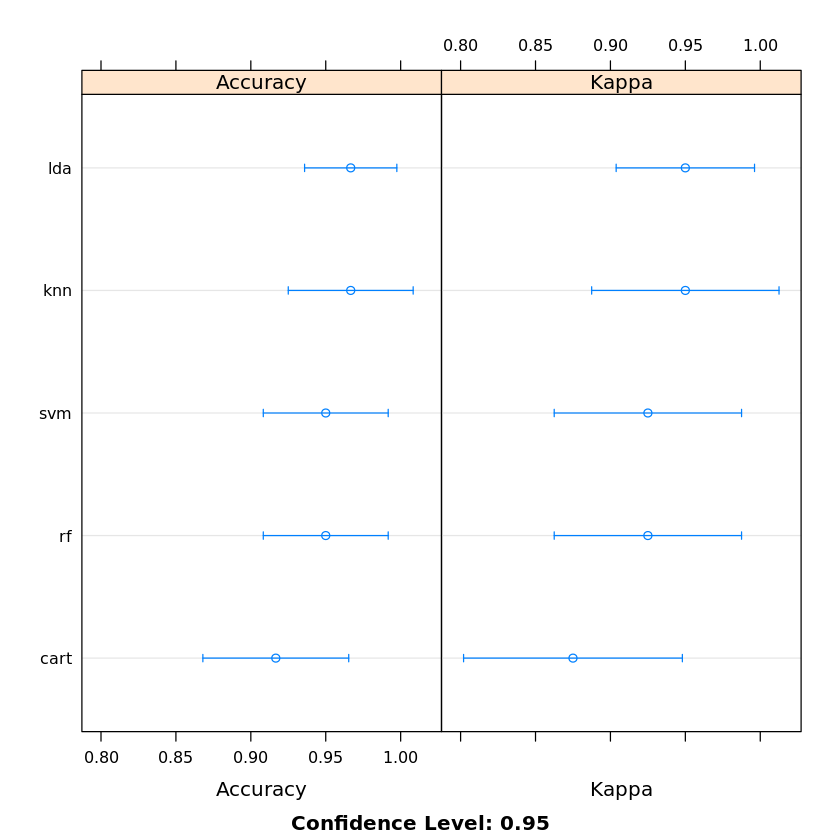

In [20]:
# compare accuracy of models
dotplot(results)

In [21]:
# summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9666667  0.95 



In [22]:
### Make Predictions

In [23]:
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
validation$Species <- as.factor(validation$Species)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              10               0              0
  Iris-versicolor           0              10              0
  Iris-virginica            0               0             10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      1.0000                 1.0000
Specificity                      1.0000                 1.0000
Pos Pred Value                   1.0000                 1.0000
Neg Pred Value                   1.0000                 1.0